**MUSHROOM CLASSIFICATION**

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np


In [ ]:
#data loading
data=pd.read_csv("https://www.dropbox.com/s/81ggs49w6255qb5/MushroomClassification.csv?dl=1")

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
f=0
for i in pd.isna(data):
  if i==True:
    print("NULL or missing values present")
    f=1
    break
  if f==0:
    print("no NULL or missing values")
    break


no NULL or missing values


In [ ]:
#split attributes into dependent and independent variables
x=data[data.columns.drop('class')]
y=data['class']

In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data.shape

(8124, 23)

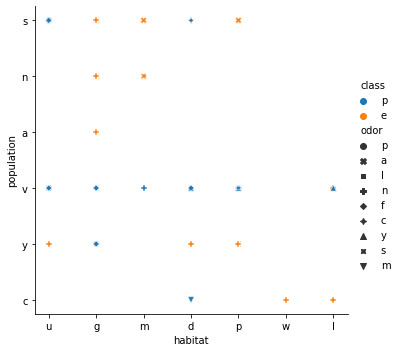

In [ ]:
#try to understand structure by visyalizing it using seaborn library
g=sns.relplot(data=data,x='habitat',y='population',hue='class',style='odor')

In [ ]:
#find count of each class
e=0
p=0
for i in y:
  if i=='e':
    e+=1
  else:
    p+=1
print('edible',e)
print('poisonous',p)

edible 4208
poisonous 3916


In [ ]:
#preprocessing
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for i in data.columns:
  data[i]=le.fit_transform(data[i])


In [ ]:
#split data into training and testing set
x=data[data.columns.drop('class')]
y=data['class']
for i in range(len(y)):
  y[i]=int(y[i])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=2529)

In [ ]:
#classification model-- RandomForest model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(x,y)

RandomForestRegressor(random_state=0)

In [ ]:
rfy_pred=rf.predict(x_test)
for i in range(len(rfy_pred)):
  rfy_pred[i]=int(rfy_pred[i])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,rfy_pred,average=None)

array([1., 1.])

In [ ]:
#roc_auc_score
from sklearn.metrics import roc_auc_score
rfroc=roc_auc_score(y_test,rfy_pred)

In [ ]:
from sklearn.metrics import accuracy_score
rfc=accuracy_score(y_test,rfy_pred)
rf0c

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rfy_pred)

array([[2955,    0],
       [   0, 2732]])